In [1]:
!pip install opencv-python
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 30.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for dlib: filename=dlib-19.24.1-cp37-cp37m-linux_x86_64.whl size=3380597 sha256=82140c6277c0b3a2fb82caf11d085e868dd089c5189b6ffd741c2818faba5d84
  Stored in directory: /root/.cache/pip/wheels/be/28/ef/be877f85f9760adadab2a51707ff31c835be8631e38866bad1
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=1f58aa8c23b4839a9d14121c96f0becdf81eacbf1eac9f47078c688ac8e4a584
  Stored in directory: /root/.cache/pip/wheels/65/cf/0a/4f8e7e42906ede15f4cdf00d6a8f451e4785679155ce17368c
Successfully built dlib face-recognition-models


In [2]:
import numpy as np
import cv2
import face_recognition
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread(r'/kaggle/input/emotion-detection-fer/test/sad/im0.png')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)

(48, 48, 3)


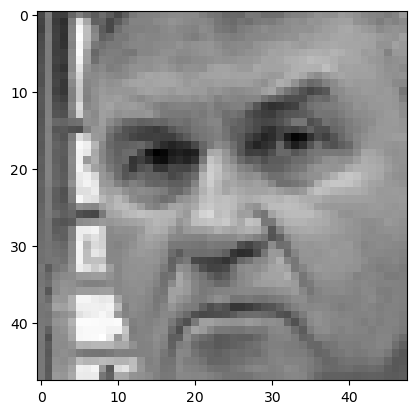

In [4]:
plt.imshow(img1, cmap='gray')

In [5]:
landmarks = face_recognition.face_landmarks(img1)[0]
print(landmarks)

{'chin': [(8, 21), (8, 26), (9, 31), (10, 35), (11, 40), (13, 44), (16, 47), (19, 48), (24, 48), (29, 48), (35, 47), (41, 45), (45, 41), (47, 35), (48, 29), (48, 23), (47, 16)], 'left_eyebrow': [(9, 17), (10, 14), (13, 13), (16, 14), (19, 14)], 'right_eyebrow': [(26, 13), (29, 11), (33, 9), (37, 9), (40, 12)], 'nose_bridge': [(22, 18), (22, 22), (21, 25), (21, 28)], 'nose_tip': [(18, 32), (20, 32), (22, 33), (25, 32), (28, 31)], 'left_eye': [(12, 21), (14, 19), (17, 18), (19, 20), (17, 21), (14, 21)], 'right_eye': [(29, 18), (31, 16), (34, 16), (37, 17), (34, 18), (31, 19)], 'top_lip': [(18, 40), (19, 38), (21, 37), (23, 38), (25, 37), (28, 37), (31, 39), (30, 39), (25, 38), (23, 39), (21, 39), (19, 40)], 'bottom_lip': [(31, 39), (29, 40), (26, 41), (24, 42), (22, 42), (20, 41), (18, 40), (19, 40), (21, 40), (23, 40), (26, 39), (30, 39)]}


In [6]:
for i, v in landmarks.items():
    print(i,v)
    for j in v:
        cv2.circle(img, j, 0, (0,255,255))
cv2.imwrite('face.jpg', img)

chin [(8, 21), (8, 26), (9, 31), (10, 35), (11, 40), (13, 44), (16, 47), (19, 48), (24, 48), (29, 48), (35, 47), (41, 45), (45, 41), (47, 35), (48, 29), (48, 23), (47, 16)]
left_eyebrow [(9, 17), (10, 14), (13, 13), (16, 14), (19, 14)]
right_eyebrow [(26, 13), (29, 11), (33, 9), (37, 9), (40, 12)]
nose_bridge [(22, 18), (22, 22), (21, 25), (21, 28)]
nose_tip [(18, 32), (20, 32), (22, 33), (25, 32), (28, 31)]
left_eye [(12, 21), (14, 19), (17, 18), (19, 20), (17, 21), (14, 21)]
right_eye [(29, 18), (31, 16), (34, 16), (37, 17), (34, 18), (31, 19)]
top_lip [(18, 40), (19, 38), (21, 37), (23, 38), (25, 37), (28, 37), (31, 39), (30, 39), (25, 38), (23, 39), (21, 39), (19, 40)]
bottom_lip [(31, 39), (29, 40), (26, 41), (24, 42), (22, 42), (20, 41), (18, 40), (19, 40), (21, 40), (23, 40), (26, 39), (30, 39)]


True

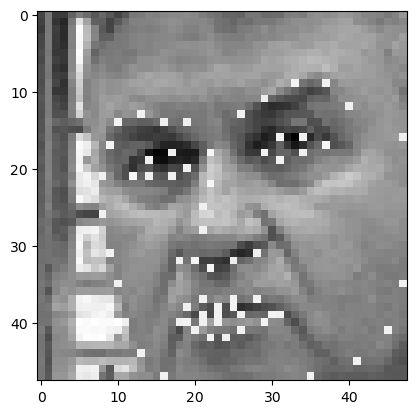

In [7]:
output = cv2.imread(r'/kaggle/working/face.jpg')
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2GRAY), cmap='gray')

In [9]:
def distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return ((x1-x2)**2 + (y1-y2)**2)**.5

In [10]:
def features(image_path):
    img = cv2.imread(image_path)
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    landmarks = face_recognition.face_landmarks(img1)
    if len(landmarks) ==0:
        return 0
    else:
        landmarks = landmarks[0]
        points = []
        for i, v in landmarks.items():
            points.extend(v)
        distances = []
        for i in points:
            distances.extend([distance(i, k) for k in points])
        return distances

In [11]:
import os

In [12]:
X_train, X_test, y_train, y_test = ([], [], [], [])
for dirname, _, filenames in os.walk('/kaggle/input/emotion-detection-fer/'):
    for file in filenames:
        if file.endswith('.png'):
            label = dirname.split('/')[-2]
            category = dirname.split('/')[-1]
            feat = features(os.path.join(dirname, file))
            if label == 'test':
                X_test.append([0]*5184 if feat == 0 else feat)
                y_test.append('can not say' if feat == 0 else category)
            else:
                X_train.append([0]*5184 if feat == 0 else feat)
                y_train.append('can not say' if feat == 0 else category)

In [13]:
len(X_test)

7178

In [14]:
len(X_train)

28709

In [15]:
categories = list(set(y_test))
print(categories)

['happy', 'can not say', 'fearful', 'angry', 'sad', 'surprised', 'neutral', 'disgusted']


In [16]:
def labeling(x):
    for i in range(len(x)):
        x[i] = categories.index(x[i])
    return np.array(x)

In [17]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = labeling(y_train)
y_test = labeling(y_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred), '\n', classification_report(y_test, y_pred))

[[1161    0   36   19   25   32  109    0]
 [   0 2225    0    0    0    0    0    0]
 [ 100    0  114   66   62   86  216    1]
 [ 149    0   46  165   48   35  204    1]
 [ 126    0   61   72  101   20  284    2]
 [  68    0   47   23   19  342   96    3]
 [  98    0   44   58   88   26  614    1]
 [  22    0    9   11    6    4   24    9]] 
               precision    recall  f1-score   support

           0       0.67      0.84      0.75      1382
           1       1.00      1.00      1.00      2225
           2       0.32      0.18      0.23       645
           3       0.40      0.25      0.31       648
           4       0.29      0.15      0.20       666
           5       0.63      0.57      0.60       598
           6       0.40      0.66      0.50       929
           7       0.53      0.11      0.18        85

    accuracy                           0.66      7178
   macro avg       0.53      0.47      0.47      7178
weighted avg       0.64      0.66      0.64      7178



In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred), '\n', classification_report(y_test, y_pred))

[[ 939    0   93   85   88   62  107    8]
 [   0 2225    0    0    0    0    0    0]
 [  79    0  195   96   78   73  110   14]
 [  90    0   95  214  103   54   82   10]
 [  99    0   80   98  169   39  170   11]
 [  43    0   61   41   26  383   36    8]
 [ 108    0  108  101  174   52  375   11]
 [   9    0    7   11   14    3   10   31]] 
               precision    recall  f1-score   support

           0       0.69      0.68      0.68      1382
           1       1.00      1.00      1.00      2225
           2       0.31      0.30      0.30       645
           3       0.33      0.33      0.33       648
           4       0.26      0.25      0.26       666
           5       0.58      0.64      0.61       598
           6       0.42      0.40      0.41       929
           7       0.33      0.36      0.35        85

    accuracy                           0.63      7178
   macro avg       0.49      0.50      0.49      7178
weighted avg       0.63      0.63      0.63      7178

